## Importing Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import streamlit as st

## Importing Dataset

In [131]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [132]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [133]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [134]:
mi=min(df['area'])
print(mi)
mx=max(df['area'])
print(mx)

1650
16200


## Describing Data

In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


## Identifying Data Types of Each Column

In [136]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Checking For Null Values and Duplicate Records

In [138]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [139]:
df.duplicated().sum()

0

## Checking Unique values

In [140]:
for col in df.columns[2:]:
    print(col)
    print(df[col].value_counts())

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64
bathrooms
1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64
stories
2    238
1    227
4     41
3     39
Name: stories, dtype: int64
mainroad
yes    468
no      77
Name: mainroad, dtype: int64
guestroom
no     448
yes     97
Name: guestroom, dtype: int64
basement
no     354
yes    191
Name: basement, dtype: int64
hotwaterheating
no     520
yes     25
Name: hotwaterheating, dtype: int64
airconditioning
no     373
yes    172
Name: airconditioning, dtype: int64
parking
0    299
1    126
2    108
3     12
Name: parking, dtype: int64
prefarea
no     417
yes    128
Name: prefarea, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [141]:
df['price']=df['price']/1000000

## Plotting Histogram to Check Data Distribution

Text(0, 0.5, 'Frequency')

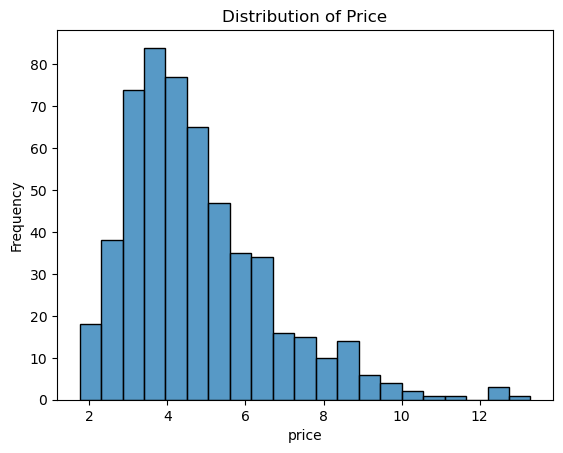

In [142]:
sns.histplot(x='price',data=df)
plt.title("Distribution of Price")
#plt.xlabel('Price')
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

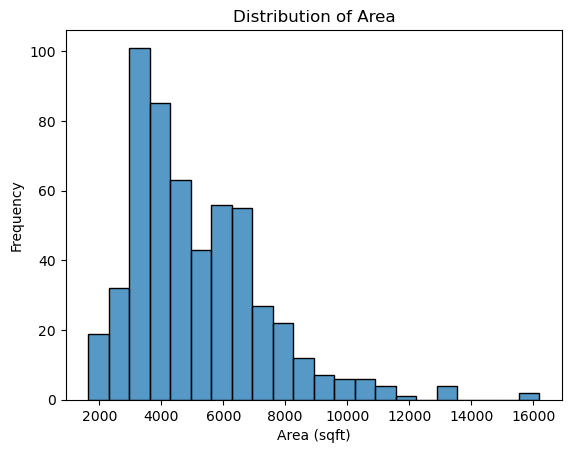

In [143]:
sns.histplot(x='area',data=df)
plt.title("Distribution of Area")
plt.xlabel("Area (sqft)")
plt.ylabel("Frequency")

In [144]:
#sns.displot(x='price',kind='hist',data=df)


<Axes: xlabel='area', ylabel='price'>

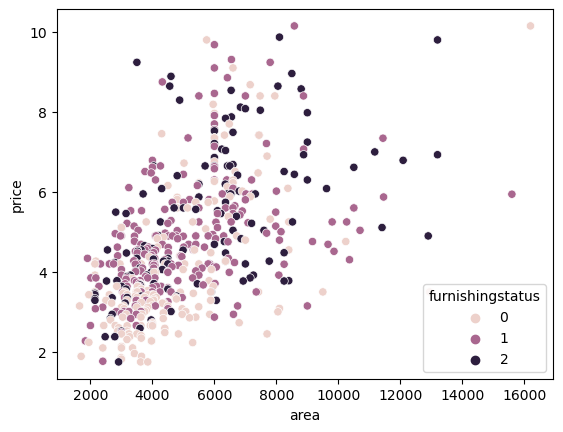

In [230]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

<Axes: xlabel='bedrooms', ylabel='price'>

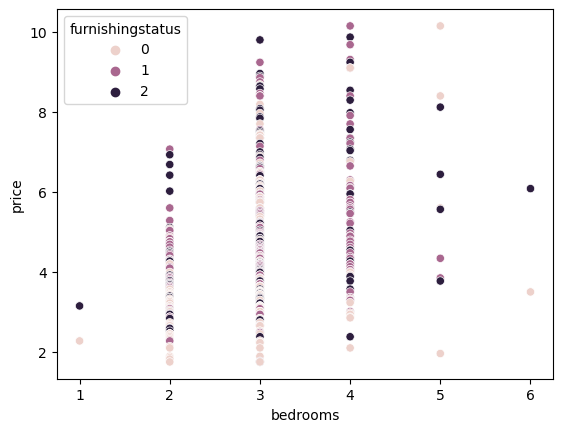

In [231]:
sns.scatterplot(y=df['price'],x=df['bedrooms'],hue=df['furnishingstatus'])

## Checking For Outliers

In [232]:
fig=px.box(df,y='price')
fig.show()

In [146]:
# Calculate mean and standard deviation
mean = df['price'].mean()
std_dev = df['price'].std()

# Define the threshold for outliers (e.g., mean ± 3 standard deviations)
threshold = 3

# Identify outliers
outliers = df[(df['price'] < mean - threshold * std_dev) | (df['price'] > mean + threshold * std_dev)]
#print(outliers)
# Drop outliers
df = df.drop(outliers.index)

print(df)

        price   area  bedrooms  bathrooms  stories mainroad guestroom  \
6    10.15000   8580         4          3        4      yes        no   
7    10.15000  16200         5          3        2      yes        no   
8     9.87000   8100         4          1        2      yes       yes   
9     9.80000   5750         3          2        4      yes       yes   
10    9.80000  13200         3          1        2      yes        no   
..        ...    ...       ...        ...      ...      ...       ...   
540   1.82000   3000         2          1        1      yes        no   
541   1.76715   2400         3          1        1       no        no   
542   1.75000   3620         2          1        1      yes        no   
543   1.75000   2910         3          1        1       no        no   
544   1.75000   3850         3          1        2      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
6         no              no             yes        2    

{'whiskers': [<matplotlib.lines.Line2D at 0x21c92809cf0>,
 'caps': [<matplotlib.lines.Line2D at 0x21c964a6cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c9280ad40>],
 'medians': [<matplotlib.lines.Line2D at 0x21c964a4340>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c964a5030>],
 'means': []}

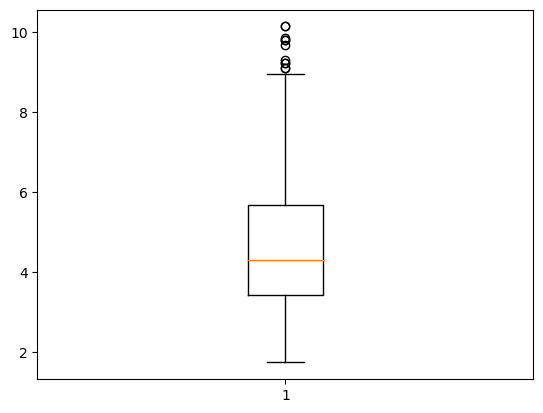

In [147]:
plt.boxplot(df['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21c964fbb50>,
 'caps': [<matplotlib.lines.Line2D at 0x21c964fbf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c964fb8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x21c965104f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c96510790>],
 'means': []}

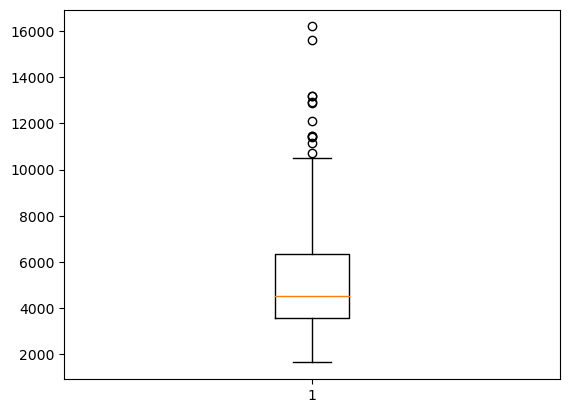

In [148]:
plt.boxplot(df['area'])

## Checking Correlation

In [149]:
correlation=df.corr()['price'].sort_values(ascending=False)
correlation

C:\Users\manas\AppData\Local\Temp\ipykernel_6272\1372368082.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



price        1.000000
area         0.529053
bathrooms    0.491267
stories      0.433177
bedrooms     0.358331
parking      0.338421
Name: price, dtype: float64

C:\Users\manas\AppData\Local\Temp\ipykernel_6272\58359773.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

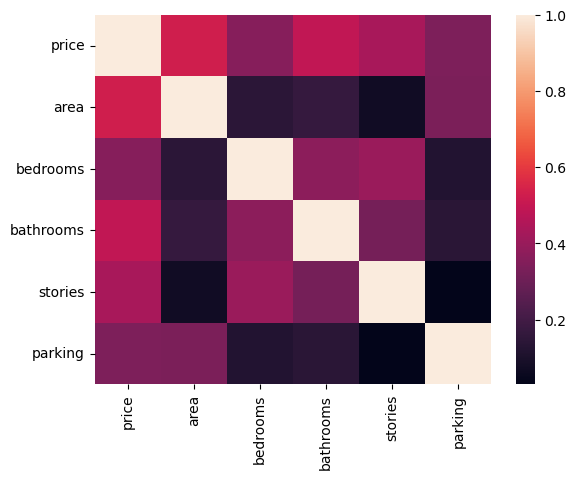

In [150]:
sns.heatmap(df.corr())

## Encoding categorical Data

In [151]:
le=LabelEncoder()

In [152]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object' :
        le.fit(df[col])
        df[col]=le.transform(df[col])
        if col == 'furnishingstatus':
             df['furnishingstatus']=df['furnishingstatus'].replace({2:0,0:2})

In [153]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10.15000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10.15000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9.87000,8100,4,1,2,1,1,1,0,1,2,1,2
9,9.80000,5750,3,2,4,1,1,0,0,1,1,1,0
10,9.80000,13200,3,1,2,1,0,1,0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.82000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1.76715,2400,3,1,1,0,0,0,0,0,0,0,1
542,1.75000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1.75000,2910,3,1,1,0,0,0,0,0,0,0,2


## Splitting Dataset : Independent Variable & Dependent Variable
                    

In [167]:
X=(df.drop(columns=['price'],axis=0))
y=df['price']
print(X)
print(y)

      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
6     8580         4          3        4         1          0         0   
7    16200         5          3        2         1          0         0   
8     8100         4          1        2         1          1         1   
9     5750         3          2        4         1          1         0   
10   13200         3          1        2         1          0         1   
..     ...       ...        ...      ...       ...        ...       ...   
540   3000         2          1        1         1          0         1   
541   2400         3          1        1         0          0         0   
542   3620         2          1        1         1          0         0   
543   2910         3          1        1         0          0         0   
544   3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
6                  0  

## Scaling the Data

In [168]:
sc=StandardScaler()

In [169]:
X['area']=sc.fit_transform(X[['area']])

In [170]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,1.607004,4,3,4,1,0,0,0,1,2,1,1
7,5.143483,5,3,2,1,0,0,0,0,0,0,0
8,1.384234,4,1,2,1,1,1,0,1,2,1,2
9,0.293587,3,2,4,1,1,0,0,1,1,1,0
10,3.751168,3,1,2,1,0,1,0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.982701,2,1,1,1,0,1,0,0,2,0,0
541,-1.261164,3,1,1,0,0,0,0,0,0,0,1
542,-0.694956,2,1,1,1,0,0,0,0,0,0,0
543,-1.024470,3,1,1,0,0,0,0,0,0,0,2


## Splitting dataset into Train & Sest Set

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [173]:
X_train.shape

(431, 12)

In [174]:
X_test.shape

(108, 12)

In [175]:
y_train.shape

(431,)

In [176]:
y_test.shape

(108,)

# Buliding Model

## Linear regression

In [177]:
Multiple_linear=LinearRegression()
Multiple_linear.fit(X_train,y_train)
Y_pred_lr=Multiple_linear.predict(X_test)

In [178]:
Multiple_linear.score(X_train,y_train)

0.662768343319782

In [179]:
Multiple_linear.score(X_test,y_test)

0.7314234645617563

In [180]:
mae=mean_absolute_error(y_test,Y_pred_lr)
mse=mean_squared_error(y_test,Y_pred_lr)
rmse=np.sqrt(mse)
r2=r2_score(y_test,Y_pred_lr)
#adjusted_r2=1-[((1-r2)*(545-1))/(545-1-12)]
print(mae)
print(mse)
print(r2)
rmse

0.7262914115814525
0.8032486701274756
0.7314234645617563


0.8962414128612198

## Lasso regression 

In [181]:
lasso=Lasso()
lasso.fit(X_train,y_train)


Lasso()

In [182]:
y_pred_laaso=lasso.predict(X_test)

In [183]:
lasso.score(X_train,y_train)

0.0

In [184]:
lasso.score(X_test,y_test)

-8.491950549416316e-07

In [185]:
mae=mean_absolute_error(y_test,y_pred_laaso)
mse=mean_squared_error(y_test,y_pred_laaso)
r2=r2_score(y_test,y_pred_laaso)
print(mae)
print(mse)
print(r2)

1.4050962189567755
2.9907651870316596
-8.491950549416316e-07


## Ridge Regression

In [186]:
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

In [187]:
y_pred_ridge=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred_ridge)
mse=mean_squared_error(y_test,y_pred_ridge)
r2=r2_score(y_test,y_pred_ridge)
print(mae)
print(mse)
print(r2)

0.7249678829514913
0.8039064609919727
0.7312035237165364


## Decision Tree regressor

In [188]:
dc=DecisionTreeRegressor()
dc.fit(X_train,y_train)

DecisionTreeRegressor()

In [189]:
y_pred_dc=dc.predict(X_test)
mae=mean_absolute_error(y_test,y_pred_dc)
mse=mean_squared_error(y_test,y_pred_dc)
r2=r2_score(y_test,y_pred_dc)
print(mae)
print(mse)
print(r2)

0.9868703703703703
1.6852297777777778
0.4365217248836688


## Random Forest regressor

In [190]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [191]:
y_pred_rf=rf.predict(X_test)
mae=mean_absolute_error(y_test,y_pred_rf)
mse=mean_squared_error(y_test,y_pred_rf)
r2=r2_score(y_test,y_pred_rf)
print(mae)
print(mse)
print(r2)

0.751742129012345
0.9173938301755767
0.6932575605735212


In [192]:
rf.score(X_train,y_train)

0.9463815277275653

In [193]:
rf.score(X_test,y_test)

0.6932575605735212

In [196]:
n_estimators=[20,60,100,120]
max_features=[0.2,0.6,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1.0]

In [197]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'max_samples':max_samples}
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [198]:
rf=RandomForestRegressor()

In [199]:
from sklearn.model_selection import GridSearchCV

rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)

In [200]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [201]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.5,
 'n_estimators': 120}

In [202]:








rf_grid.best_score_

0.6129771738391184

In [203]:
rf_updated=RandomForestRegressor(n_estimators=100, max_depth=8,max_features=0.2,max_samples=1.0)

In [204]:
rf_updated.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=0.2, max_samples=1.0)

In [205]:
ypred_rf_new=rf_updated.predict(X_test)

In [206]:
mae=mean_absolute_error(y_test,ypred_rf_new)
mse=mean_squared_error(y_test,ypred_rf_new)
r2=r2_score(y_test,ypred_rf_new)
print(mae)
print(mse)
print(r2)

0.6807211436950543
0.8992037255319105
0.6993396562758143


In [207]:
import pickle

In [208]:
filename="trained_model.sav"
pickle.dump(rf_updated,open(filename,'wb'))

In [209]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [213]:
input_data=(2000,2,2,5,1,0,0,1,1,1,1,2)
inputasnparray=np.array(input_data).reshape(1,-1)
prediction=loaded_model.predict(inputasnparray)
prediction

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([6.99243814])

In [214]:
from IPython.display import FileLink

# Create a link to download the pickle file
FileLink('trained_model.sav')

C:\Users\manas\Softtrine\trained_model.sav

In [215]:
model=pickle.load(open('trained_model.sav','rb'))

In [216]:
pred=model.predict(inputasnparray)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [217]:
pred

array([6.99243814])

In [218]:
filename=".sav"
pickle.dump(rf_updated,open(filename,'wb'))

In [219]:
ip=2000,1,1,2,0,0,0,0,0,0,0,0
ip=np.array(ip).reshape(1,-1)

In [220]:
predrf=rf_updated.predict(ip)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [221]:
predrf

array([4.12192031])

In [222]:
preddc=dc.predict(ip)
preddc

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([4.55])

In [223]:
pred=ridge.predict(ip)
pred[0]

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names



1013.6742445255865

In [224]:
from sklearn.model_selection import cross_val_score, KFold


In [225]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [226]:
cv_scores = cross_val_score(rf_updated, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive values
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

Cross-validation scores: [1.25785075 0.78048294 1.25181216]
Mean CV score: 1.0967152855922673
Standard deviation of CV scores: 0.22362362610432293


In [227]:
rf_updated.fit(X_train, y_train)

# Optional: Evaluate the model on the test set
test_score = rf_updated.score(X_test, y_test)
print("Test set score:", test_score)

# Use the trained model for prediction
predictions = rf_updated.predict(ip)
predictions

Test set score: 0.7133335598156665


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([4.02513992])

In [228]:
rf_updated.score(X_train,y_train)

0.8478478041842767

In [229]:
rf_updated.score(X_test,y_test)

0.7133335598156665